# 1. NIH Chest X-ray Dataset

## National Institutes of Health Chest X-Ray Dataset
Chest X-ray exams are one of the most frequent and cost-effective medical imaging examinations available. However, clinical diagnosis of a chest X-ray can be challenging and sometimes more difficult than diagnosis via chest CT imaging. The lack of large publicly available datasets with annotations means it is still very difficult, if not impossible, to achieve clinically relevant computer-aided detection and diagnosis (CAD) in real world medical sites with chest X-rays. One major hurdle in creating large X-ray image datasets is the lack resources for labeling so many images. Prior to the release of this dataset, (Openi)[https://openi.nlm.nih.gov/] was the largest publicly available source of chest X-ray images with 4,143 images available.

This NIH Chest X-ray Dataset is comprised of 112,120 X-ray images with disease labels from 30,805 unique patients. **To create these labels, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports.** **The labels are expected to be >90% accurate and suitable for weakly-supervised learning.** The original radiology reports are not publicly available but you can find more details on the labeling process in this Open Access paper: "ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases." [(Wang et al)](https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community)
.


## 1.2 Data limitations:
The image labels are NLP extracted so there could be some erroneous labels but the NLP labeling accuracy is estimated to be >90%. Very limited numbers of disease region bounding boxes (See BBoxlist2017.csv) Chest x-ray radiology reports are not anticipated to be publicly shared. Parties who use this public dataset are encouraged to share their “updated” image labels and/or new bounding boxes in their own studied later, maybe through manual annotation



### File contents
Image format: 112,120 total images with size 1024 x 1024
* images_001.zip: Contains 4999 images
* images_002.zip: Contains 10,000 images
* images_003.zip: Contains 10,000 images
* images_004.zip: Contains 10,000 images
* images_005.zip: Contains 10,000 images
* images_006.zip: Contains 10,000 images
* images_007.zip: Contains 10,000 images
* images_008.zip: Contains 10,000 images
* images_009.zip: Contains 10,000 images
* images_010.zip: Contains 10,000 images
* images_011.zip: Contains 10,000 images
* images_012.zip: Contains 7,121 images
README_ChestXray.pdf: Original README file

### BBoxlist2017.csv: Bounding box coordinates. Note: Start at x,y, extend horizontally w pixels, and vertically h pixels
Image Index: File name
Finding Label: Disease type (Class label)
Bbox x
Bbox y
Bbox w
Bbox h

### Dataentry2017.csv: Class labels and patient data for the entire dataset
Image Index: File name
Finding Labels: Disease type (Class label)
Follow-up #
Patient ID
Patient Age
Patient Gender
View Position: X-ray orientation
OriginalImageWidth
OriginalImageHeight
OriginalImagePixelSpacing_x
OriginalImagePixelSpacing_y

### 1.3 Class descriptions
There are 15 classes (14 diseases, and one for "No findings"). Images can be classified as "No findings" or one or more disease classes:

* Atelectasis
* Consolidation
* Infiltration
* Pneumothorax
* Edema
* Emphysema
* Fibrosis
* Effusion
* Pneumonia
* Pleural_thickening
* Cardiomegaly
* Nodule Mass
* Hernia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticke
import seaborn as sns
import os
from glob import glob
from os import listdir
from os.path import join, isfile, isdir
from PIL import Image
from tqdm import tqdm
%matplotlib inline

# 1. DATA analysis

## 1.1 DATA LOADING

In [2]:
data = pd.read_csv('../input/data/Data_Entry_2017.csv')

In [3]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [5]:
data.isnull().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

**FINDINGS**

1. Here we have **112120** records for different patient so let's find how many unique patient we have in this dataset and the distribution of them

2. There is no null values in our dataframe 

In [6]:
unique_pt = data['Patient ID'].nunique()
print(f'Total number of unique patient in this dataset is {unique_pt}')

Total number of unique patient in this dataset is 30805


### DROP UNUSED COLUMNS AND EXPAND FINDING LABELS COLUMN

In [7]:
data = data[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

#create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    data[pathology] = data['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

In [8]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Let's explore patient age column to figure out if there is any outliers 

In [9]:
patient_age_max = data['Patient Age'].max()
patient_age_min = data['Patient Age'].min()

print(f'maximum patient age is {patient_age_max}')
print(f'minimum patient age is {patient_age_min}')

maximum patient age is 414
minimum patient age is 1


In [10]:
patient_age = data['Patient Age'].value_counts()
print(patient_age)

58     3209
56     2916
52     2891
55     2830
57     2771
       ... 
153       1
151       1
150       1
149       1
152       1
Name: Patient Age, Length: 107, dtype: int64


In [11]:
patient_age_above_100 = data[data['Patient Age'] >100]['Patient Age']
patient_age_less_10 = data[data['Patient Age'] <10]['Patient Age']

print(f'There are ({len(patient_age_above_100)}) patients with age more than 100 years')
print(f'There are ({len(patient_age_less_10)}) patients with age less than 10 years')

There are (16) patients with age more than 100 years
There are (1403) patients with age less than 10 years


In [12]:
above_100_years =data.loc[patient_age_above_100.index]
above_100_years

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,0,0,1,0,0,0,0,0,0,0,0,0,0,1
46965,00011973_002.png,Edema,2,11973,414,M,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48284,00012238_010.png,No Finding,10,12238,148,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55742,00013950_000.png,No Finding,0,13950,148,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,0,0,0,0,0,0,0,0,1,0,0,1,0,0
62929,00015558_000.png,No Finding,0,15558,149,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74884,00018366_044.png,Pneumothorax,44,18366,152,F,0,0,0,0,0,1,0,0,0,0,0,0,0,0
78795,00019346_000.png,Infiltration,0,19346,151,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0
84810,00020900_002.png,No Finding,2,20900,411,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [13]:
less_10_years =data.loc[patient_age_less_10.index]
less_10_years.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
4340,00001179_000.png,No Finding,0,1179,9,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5821,00001564_000.png,No Finding,0,1564,9,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5843,00001574_000.png,No Finding,0,1574,8,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6182,00001676_000.png,No Finding,0,1676,8,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6234,00001686_000.png,No Finding,0,1686,8,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### It's obvious that there are many outliers in age columns there are 16 records with ages more than 100 years and about 1400 record with ages less than 10 years they may children born with this lung diseases but let's investigate them deeper may they have a X-RAY in dataset but labeled as 'NO FINDINGS' 

* HINT no findings in data set mean columns in pathology_list all have 0


In [14]:
no_finding_less_10 = less_10_years.loc[(less_10_years[pathology_list] !=0).any(axis=1)]
len(no_finding_less_10)

563

### There are more than 500 record for patient with age less than 10 years and hasn't any psotivie '1' for any type of diseases 

# 2. DATA VISUALIZATION

### number of each diseases by patient gender


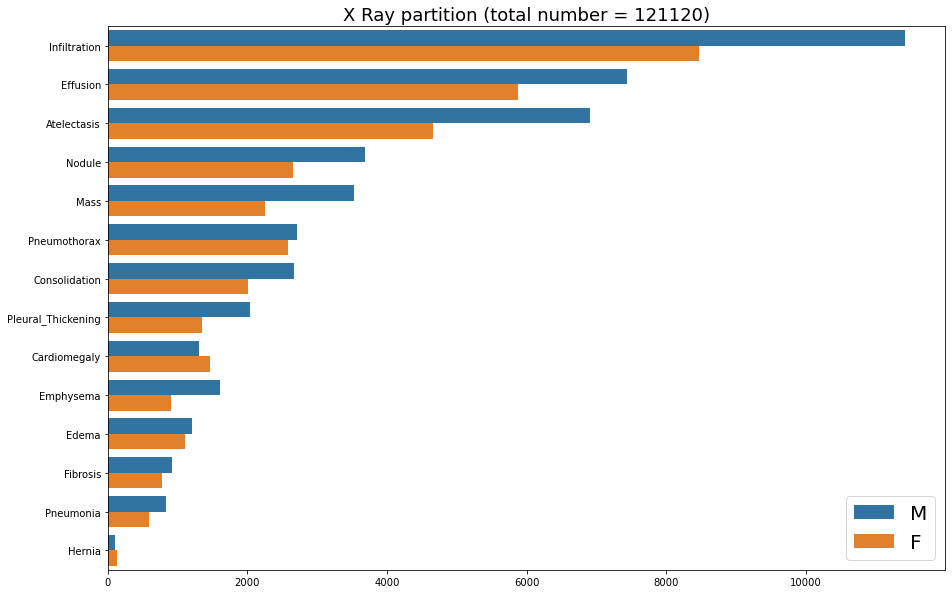

In [15]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:8, :])
# ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(data,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);


### Now check age distribution by sex:


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


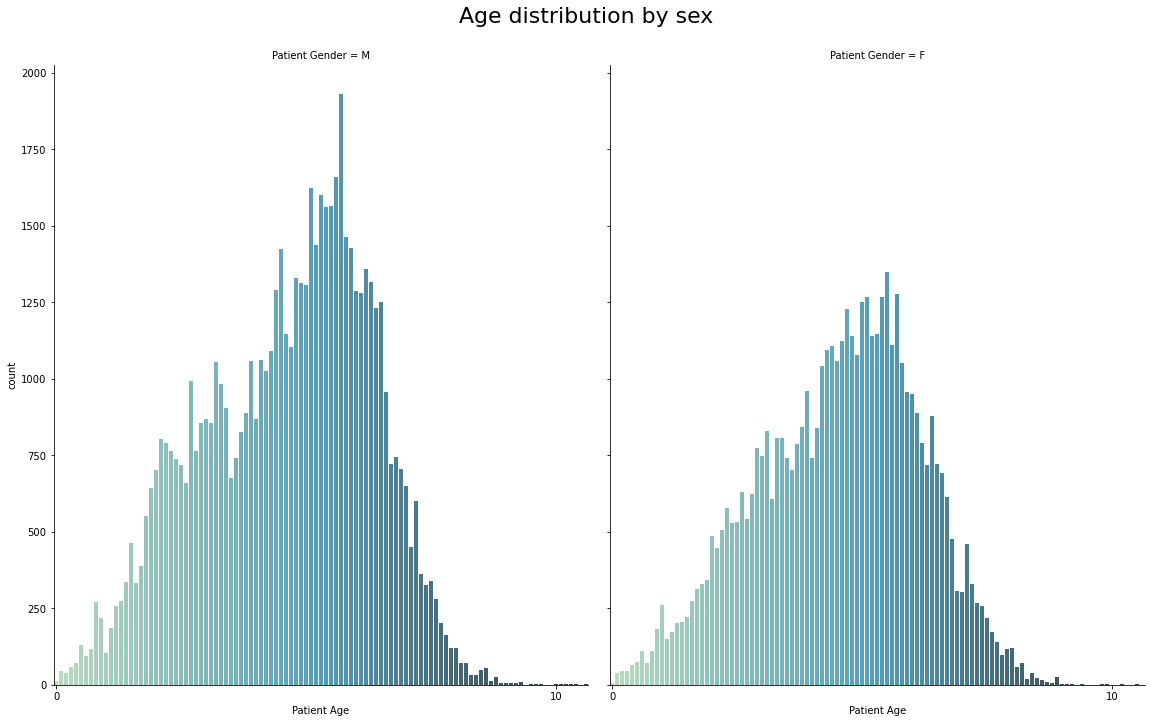

In [16]:
df_age =pd.read_csv('../input/data/Data_Entry_2017.csv')
g = sns.factorplot(x="Patient Age", col="Patient Gender",data=df_age, kind="count",size=10, aspect=0.8,palette="GnBu_d");
g.set_xticklabels(np.arange(0,107))
g.set_xticklabels(step=10)
g.fig.suptitle('Age distribution by sex',fontsize=22);
g.fig.subplots_adjust(top=.9)

### Display pathologies distribution by age&sex.

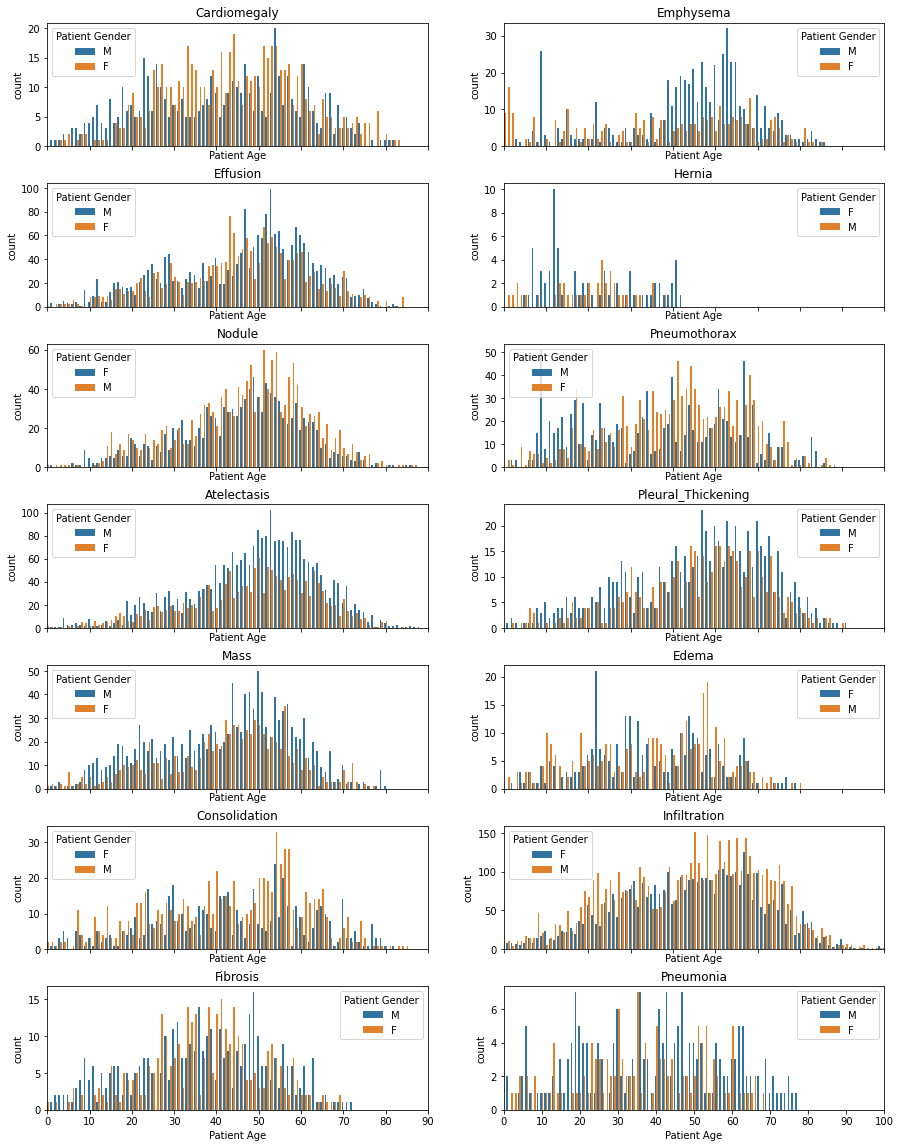

In [17]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,107,10)
for pathology in pathology_list :
    g=sns.countplot(x='Patient Age', hue="Patient Gender",data=data[data['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

### Display patient number by Follow-up 

In [18]:
data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,0,0,0,0,0,0,0,0,1,0,0,0,0,1
112116,00030802_000.png,No Finding,0,30802,29,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0


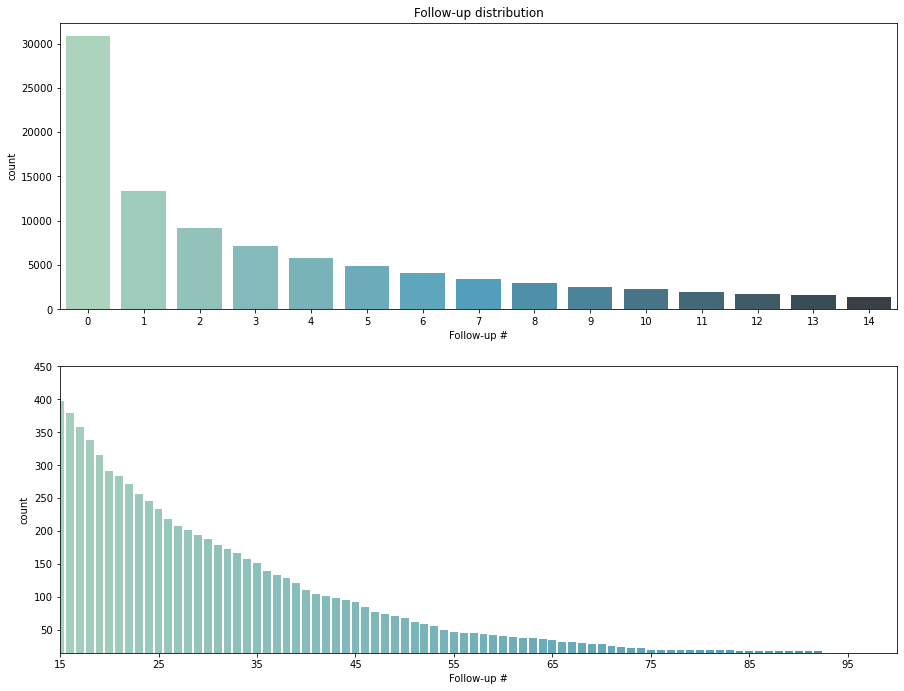

In [19]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(15, 10))

follow_up = data[data['Follow-up #']<15]
g = sns.countplot(x='Follow-up #',data=follow_up,palette="GnBu_d",ax=ax1);

ax1.set_title('Follow-up distribution');
follow_up = data[data['Follow-up #']>14]
g = sns.countplot(x='Follow-up #',data=follow_up,palette="GnBu_d",ax=ax2);
x=np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

### Try to find links between pathologies.

In [20]:
data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,0,0,0,0,0,0,0,0,1,0,0,0,0,1
112116,00030802_000.png,No Finding,0,30802,29,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
data.groupby('Finding Labels').count()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,,,,
Atelectasis,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215
Atelectasis|Cardiomegaly,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
Atelectasis|Cardiomegaly|Consolidation,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Atelectasis|Cardiomegaly|Consolidation|Edema,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pneumothorax,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194,2194
Pneumothorax|Atelectasis,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Pneumothorax|Infiltration,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [22]:
#First display Top 10 multiple deseases
df=data.groupby('Finding Labels').count().sort_values("Finding Labels")
df.head(10)

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,,,,
Atelectasis,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215,4215
Atelectasis|Cardiomegaly,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
Atelectasis|Cardiomegaly|Consolidation,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Atelectasis|Cardiomegaly|Consolidation|Edema,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration|Mass,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration|Mass|Nodule,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Mass,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Pleural_Thickening,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [23]:
#combining the path of all the folders of images.

my_glob = glob('../input/data/images*/images/*.png')
all_image_paths = {os.path.basename(x): x for x in my_glob}
data['full_path'] = data['Image Index'].map(all_image_paths.get)

<font size= 3.5>
    
    So lets drop Finding labels columns we don't need it anymore
    
</font>

In [24]:
data.drop('Finding Labels',axis =1 ,inplace=True)
data.head()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,full_path
0,00000001_000.png,0,1,58,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000001_000.png
1,00000001_001.png,1,1,58,M,1,1,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000001_001.png
2,00000001_002.png,2,1,58,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000001_002.png
3,00000002_000.png,0,2,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000002_000.png
4,00000003_000.png,0,3,81,F,0,0,0,1,0,0,0,0,0,0,0,0,0,0,../input/data/images_001/images/00000003_000.png
